In [1]:
# Import dependencies 
import os
import csv 
import pandas as pd
from pathlib import Path
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt


In [63]:
fdfunds_path= "Resources/FEDFUNDS.csv"
mortage_path= "Resources/Mortage_Rate_30_Year.csv"

In [64]:
fdfunds_df = pd.read_csv(fdfunds_path)
fdfunds_df

,DATE,FEDFUNDS
0,2019-01-01,2.40
1,2019-02-01,2.40
2,2019-03-01,2.41
3,2019-04-01,2.42
4,2019-05-01,2.39
...,...,...
60,2024-01-01,5.33
61,2024-02-01,5.33
62,2024-03-01,5.33
63,2024-04-01,5.33


In [93]:
header_names= ["DATE","MORTGAGE30US"]
mortage_df= pd.read_csv(mortage_path)
mortage_df

,DATE,MORTGAGE30US
0,2019-01-01,4.4640000000000000
1,2019-02-01,4.3700000000000000
2,2019-03-01,4.2650000000000000
3,2019-04-01,4.1425000000000000
4,2019-05-01,4.0720000000000000
...,...,...
61,2024-02-01,6.7760000000000000
62,2024-03-01,6.8200000000000000
63,2024-04-01,6.9925000000000000
64,2024-05-01,7.0600000000000000


In [94]:
data_df= pd.merge(fdfunds_df,mortage_df,how="left",on="DATE")
data_df

,DATE,FEDFUNDS,MORTGAGE30US
0,2019-01-01,2.40,4.4640000000000000
1,2019-02-01,2.40,4.3700000000000000
2,2019-03-01,2.41,4.2650000000000000
3,2019-04-01,2.42,4.1425000000000000
4,2019-05-01,2.39,4.0720000000000000
...,...,...,...
60,2024-01-01,5.33,6.6425000000000000
61,2024-02-01,5.33,6.7760000000000000
62,2024-03-01,5.33,6.8200000000000000
63,2024-04-01,5.33,6.9925000000000000


In [97]:
data_df= data_df[“MORTGAGE30US”].str.replace(“,”,“ ”)

SyntaxError: invalid character '“' (U+201C) (183419773.py, line 1)

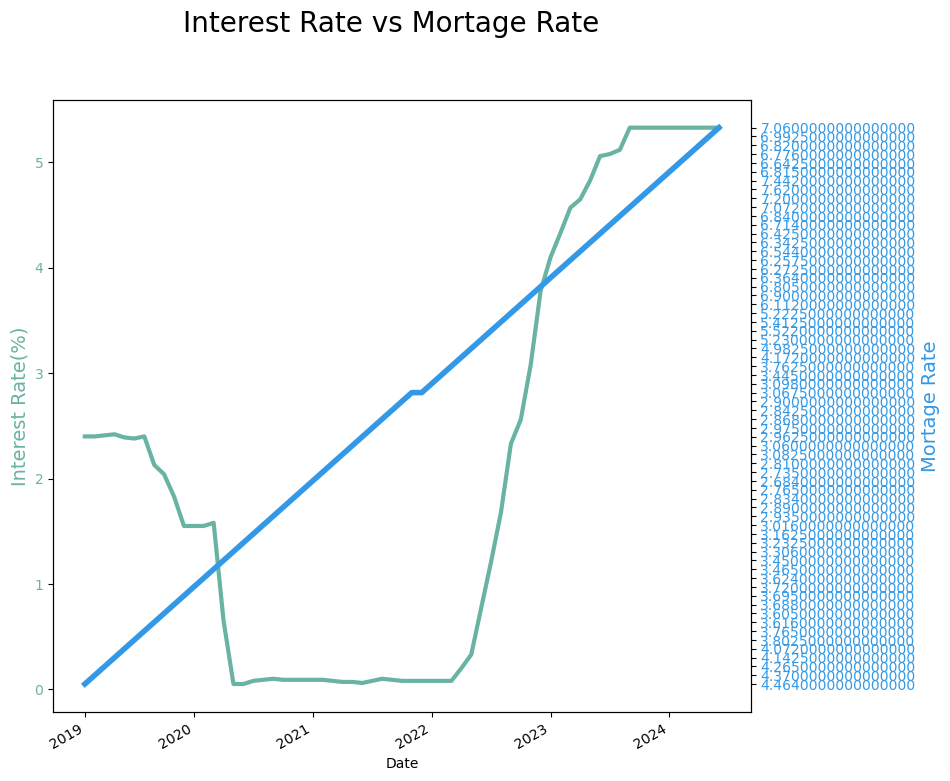

In [76]:
fdfund_color = "#69b3a2"
mortage_color = "#3399e6"

fig, ax1 = plt.subplots(figsize=(9, 9))
ax2 = ax1.twinx()

ax1.plot(data_df["DATE"],data_df["FEDFUNDS"],color=fdfund_color, lw=3)
ax2.plot(data_df["DATE"],data_df["MORTGAGE30US"], color= mortage_color, lw=4)

ax1.set_xlabel("Date")
ax1.set_ylabel("Interest Rate(%)", color=fdfund_color, fontsize=14)
ax1.tick_params(axis="y", labelcolor=fdfund_color)

ax2.set_ylabel("Mortage Rate", color=mortage_color, fontsize=14)
ax2.tick_params(axis="y", labelcolor=mortage_color)

fig.suptitle("Interest Rate vs Mortage Rate", fontsize=20)
fig.autofmt_xdate()

x1=[0,11,23,35,47,59]
labels = [2019, 2020, 2021, 2022, 2023, 2024]
plt.xticks(x1, labels,rotation=45)

# plt.savefig("Interest_Rate_vs_Median_Sales_Price.png")
plt.show()